In [4]:
market <- read.csv('./ads.txt', header=T)

In [5]:
market

ID,X,Y
<int>,<dbl>,<dbl>
1,4.2,9.3
2,8.5,18.5
3,9.3,22.8
4,7.5,17.7
5,6.3,14.6
6,12.2,27.9
7,6.5,12.5
8,10.4,25.2
9,5.8,10.8


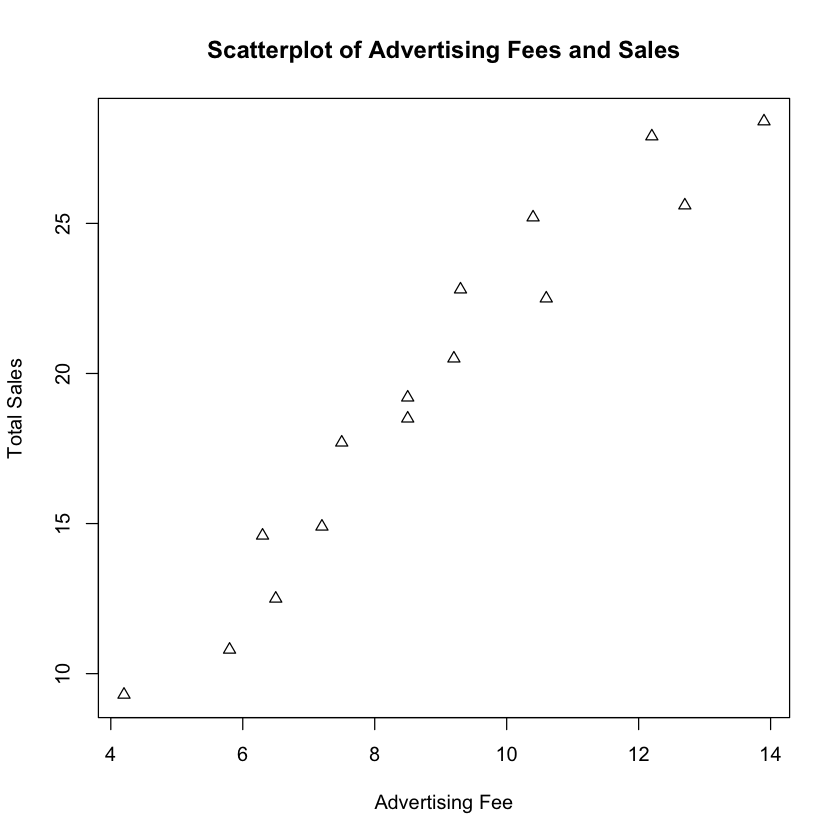

In [6]:
plot(market$X, market$Y, xlab='Advertising Fee', ylab='Total Sales', pch=2)
title('Scatterplot of Advertising Fees and Sales')

In [7]:
market.lm <- lm(Y~X,data=market)

In [8]:
market.lm


Call:
lm(formula = Y ~ X, data = market)

Coefficients:
(Intercept)            X  
     0.3282       2.1497  


In [9]:
# error계산
market.predict <- predict(market.lm, newdata = market)

In [10]:
market.predict

1         2         3         4         5         6         7         8 
 9.356851 18.600449 20.320188 16.450775 13.871166 26.554242 14.301101 22.684829 
        9        10        11        12        13        14        15 
12.796329 20.105220 15.805873 18.600449 23.114764 30.208688 27.629079

In [11]:
error <- market$Y - market.predict

In [12]:
error

1           2           3           4           5           6 
-0.05685083 -0.10044856  2.47981233  1.24922533  0.72883400  1.34575804 
          7           8           9          10          11          12 
-1.80110078  2.51517105 -1.99632905  0.39477972 -0.90587250  0.59955144 
         13          14          15 
-0.61476373 -1.80868757 -2.02907890

In [13]:
# 거의 0에 근접하게 나옴
sum(error)

[1] 1.953993e-14

In [14]:
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


In [20]:
anova.table <- anova(market.lm)
anova.table

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,485.57264,485.572638,192.9033,3.553647e-09
Residuals,13,32.72336,2.517182,NA,NA


In [21]:
rejection.region <- qf(0.95, 1, 13)
rejection.region

[1] 4.667193

In [27]:
# F 기각역(rejection.region)보다 F 값이 더 크므로 귀무가설을 기각한다 => 대립가설을 채택한다.
anova.table[['F value']][1] > rejection.region

[1] TRUE

In [28]:
# 이 값은 anova의 Pr과 값이 같다.(anova table 참조)
1 - pf(anova.table[['F value']][1], anova.table[['Df']][1], anova.table[['Df']][2])

[1] 3.553647e-09